In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
import ipywidgets as widgets
import os

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import display,clear_output
from warnings import filterwarnings

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:

labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

X_train = []
y_train = []
image_size = 224

for i in labels:
    folderPath = os.path.join('/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/train', i)
    
    if os.path.exists(folderPath):
        for j in tqdm(os.listdir(folderPath)):
            img = cv2.imread(os.path.join(folderPath, j))
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)

for i in labels:
    folderPath = os.path.join('/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/test', i)
    
    if os.path.exists(folderPath):
        for j in tqdm(os.listdir(folderPath)):
            img = cv2.imread(os.path.join(folderPath, j))
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 90/90 [00:00<00:00, 330.56it/s]


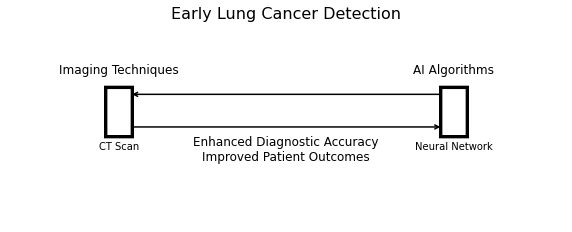

In [43]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Add title
ax.text(0.5, 0.95, 'Early Lung Cancer Detection', fontsize=16, ha='center')

# Add text labels for imaging techniques and AI algorithms
ax.text(0.2, 0.7, 'Imaging Techniques', fontsize=12, ha='center')
ax.text(0.8, 0.7, 'AI Algorithms', fontsize=12, ha='center')

# Add lung CT scan icon
ax.text(0.2, 0.45, '\U0001F4C8', fontsize=60, ha='center')
ax.text(0.2, 0.35, 'CT Scan', fontsize=10, ha='center')

# Add neural network icon
ax.text(0.8, 0.45, '\U0001F4E1', fontsize=60, ha='center')
ax.text(0.8, 0.35, 'Neural Network', fontsize=10, ha='center')

# Draw arrows indicating flow of data
arrowprops = dict(facecolor='black', arrowstyle='->', linewidth=1.5)
ax.annotate('', xy=(0.22, 0.6), xytext=(0.78, 0.6), arrowprops=arrowprops)
ax.annotate('', xy=(0.78, 0.45), xytext=(0.22, 0.45), arrowprops=arrowprops)

# Add additional information
ax.text(0.5, 0.3, 'Enhanced Diagnostic Accuracy\nImproved Patient Outcomes', fontsize=12, ha='center')

# Hide axes
ax.axis('off')

# Save or display the diagram
plt.savefig('lung_cancer_detection_diagram.png')  # Save the diagram as an image file
plt.show()


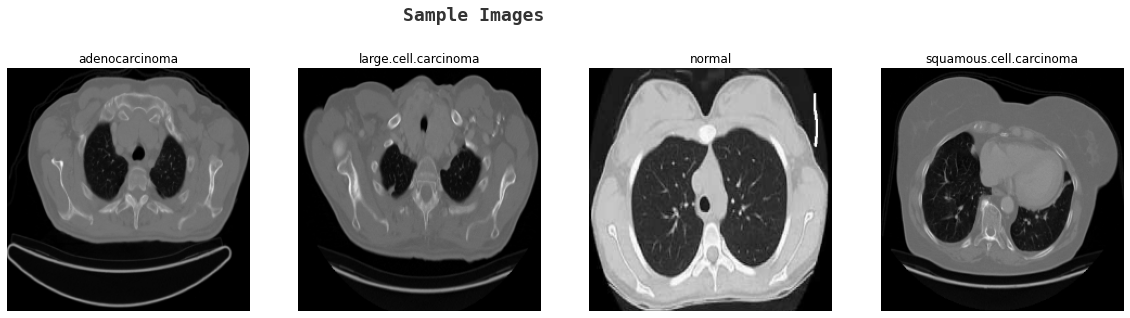

In [4]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(1, 4, figsize=(20, 20))
fig.text(s='Sample Images', size=18, fontweight='bold',
         fontname='monospace', color='black', y=0.62, x=0.4, alpha=0.8)
for i, label in enumerate(labels):
    for j, y in enumerate(y_train):
        if y == label:
            ax[i].imshow(X_train[j])
            ax[i].set_title(label)
            ax[i].axis('off')
            break






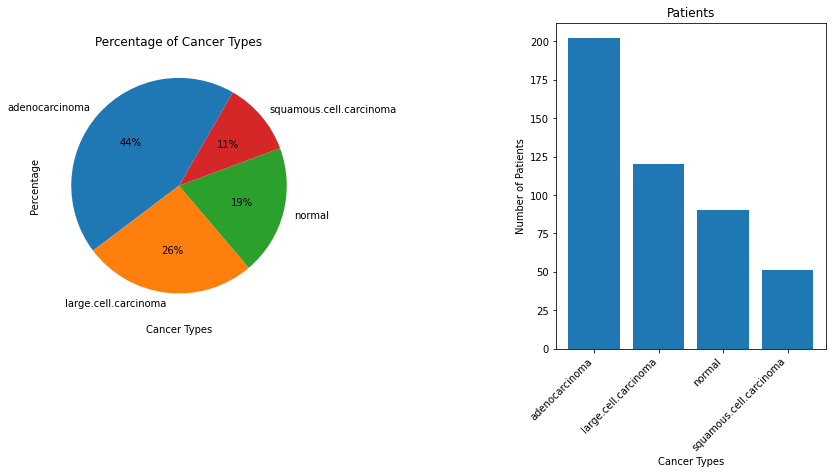

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14, 6))
y_train_series = pd.Series(y_train)

ax1.pie(y_train_series.value_counts(), labels=labels, autopct='%1.0f%%', startangle=60)
ax1.set(title='Percentage of Cancer Types')
ax1.set_xlabel('Cancer Types')  
ax1.set_ylabel('Percentage')     

ax2.bar(labels, y_train_series.value_counts())
ax2.set(title='Patients')
ax2.set_xlabel('Cancer Types')  
ax2.set_ylabel('Number of Patients')  

plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.subplots_adjust(wspace=0.9)  
plt.show()

In [4]:
import numpy as np

unique_values = np.unique(y_train)
print("Unique values in y_train:", unique_values)
print("Data type of elements in y_train:", type(y_train[0])


Unique values in y_train: ['adenocarcinoma' 'large.cell.carcinoma' 'normal'
 'squamous.cell.carcinoma']
Data type of elements in y_train: <class 'numpy.str_'>
First few elements in y_train: ['normal' 'normal' 'normal' 'normal' 'normal']


In [6]:

X_train, y_train = shuffle(X_train,y_train, random_state=101)

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

y_train_new = []

for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:

    y_test_new.append(labels.index(i))
y_test = y_test_new

y_test = tf.keras.utils.to_categorical(y_test)

effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("chest.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=22, verbose=2, batch_size=32, callbacks=[tensorboard, checkpoint, 
                                                                                                            reduce_lr, early_stopping])


Epoch 1/22

Epoch 1: val_accuracy improved from -inf to 0.60811, saving model to chest.h5


/Users/sonamchoden/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 59s - loss: 0.7370 - accuracy: 0.6926 - val_loss: 1.0932 - val_accuracy: 0.6081 - lr: 0.0010 - 59s/epoch - 6s/step
Epoch 2/22

Epoch 2: val_accuracy improved from 0.60811 to 0.74324, saving model to chest.h5
10/10 - 46s - loss: 0.2009 - accuracy: 0.9324 - val_loss: 0.7896 - val_accuracy: 0.7432 - lr: 0.0010 - 46s/epoch - 5s/step
Epoch 3/22

Epoch 3: val_accuracy improved from 0.74324 to 0.86486, saving model to chest.h5
10/10 - 46s - loss: 0.0617 - accuracy: 0.9831 - val_loss: 0.7906 - val_accuracy: 0.8649 - lr: 0.0010 - 46s/epoch - 5s/step
Epoch 4/22

Epoch 4: val_accuracy improved from 0.86486 to 0.87838, saving model to chest.h5
10/10 - 46s - loss: 0.0832 - accuracy: 0.9797 - val_loss: 0.6544 - val_accuracy: 0.8784 - lr: 0.0010 - 46s/epoch - 5s/step
Epoch 5/22

Epoch 5: val_accuracy did not improve from 0.87838
10/10 - 46s - loss: 0.1129 - accuracy: 0.9459 - val_loss: 1.3971 - val_accuracy: 0.8108 - lr: 0.0010 - 46s/epoch - 5s/step
Epoch 6/22

Epoch 6: val_accuracy did not i

In [7]:
y_pred = model.predict(X_test)
np.save("y_pred.npy", y_pred)
y_pred_loaded = np.load("y_pred.npy")

3/3 [==============================] - 4s 984ms/step


In [1]:

y_pred_loaded = np.load("y_pred.npy")


NameError: name 'np' is not defined

In [14]:
from keras.applications import InceptionResNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam


train_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/train'
val_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/valid'
test_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/test'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

base_model2 = InceptionResNetV2(weights='imagenet', include_top=False)
for layer in base_model2.layers:
    layer.trainable = False

model2 = Sequential([
    base_model2,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_model2 = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Epoch 1/100
20/20 [==============================] - 76s 3s/step - loss: 1.2572 - accuracy: 0.4388 - val_loss: 1.2099 - val_accuracy: 0.4722
Epoch 2/100
20/20 [==============================] - 68s 3s/step - loss: 1.0266 - accuracy: 0.5367 - val_loss: 1.0709 - val_accuracy: 0.4722
Epoch 3/100
20/20 [==============================] - 68s 3s/step - loss: 0.9356 - accuracy: 0.5791 - val_loss: 1.0817 - val_accuracy: 0.4861
Epoch 4/100
20/20 [==============================] - 68s 3s/step - loss: 0.8781 - accuracy: 0.6003 - val_loss: 1.1447 - val_accuracy: 0.4861
Epoch 5/100
20/20 [==============================] - 68s 3s/step - loss: 0.8248 - accuracy: 0.6281 - val_loss: 1.0695 - val_accuracy: 0.5139
Epoch 6/100
20/20 [==============================] - 68s 3s/step - loss: 0.8206 - accuracy: 0.6378 - val_loss: 1.0048 - val_accuracy: 0.5139
Epoch 7/100
20/20 [=============

In [18]:
y_pred_model2 = model2.predict(test_generator)


10/10 [==============================] - 34s 3s/step


In [19]:
print("Number of samples in y_pred:", y_pred.shape[0])
print("Number of samples in y_pred_model2:", y_pred_model2.shape[0])


Number of samples in y_pred: 93
Number of samples in y_pred_model2: 315


In [32]:
num_samples_to_replicate = y_pred_model2.shape[0] - y_pred.shape[0]
random_indices = np.random.choice(y_pred.shape[0], size=num_samples_to_replicate, replace=True)
y_pred_upsampled = np.concatenate([y_pred, y_pred[random_indices]])


In [33]:
num_samples_to_replicate = y_pred_model2.shape[0] - y_pred.shape[0]
random_indices = np.random.choice(y_pred.shape[0], size=num_samples_to_replicate, replace=True)
y_pred_upsampled = np.concatenate([y_pred, y_pred[random_indices]])
print("Number of samples in y_pred:", y_pred_upsampled.shape[0])
print("Number of samples in y_pred_model2:", y_pred_model2.shape[0])


Number of samples in y_pred: 315
Number of samples in y_pred_model2: 315


In [35]:
stacked_predictions = np.hstack((y_pred_upsampled, y_pred_model2))
file_path = "stacked_predictions.npy"
np.save(file_path, stacked_predictions)


In [8]:
import numpy as np

stacked_predictions = np.hstack((y_pred_upsampled, y_pred_model2))
file_path = "stacked_predictions.npy"
np.save(file_path, stacked_predictions)
stacked_predictions = np.load(file_path)
num_samples = stacked_predictions.shape[0]

print("Number of samples:", num_samples)

Number of samples: 315


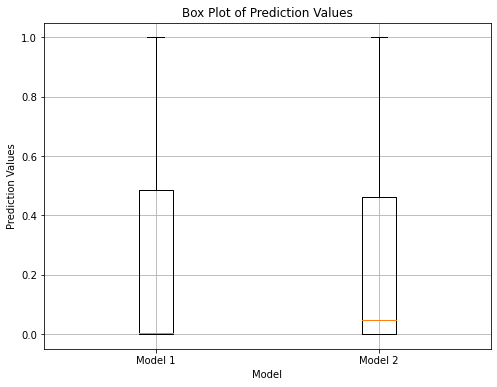

In [25]:
import matplotlib.pyplot as plt

y_pred_subset_flat = y_pred_subset.flatten()
y_pred_model2_subset_flat = y_pred_model2_subset.flatten()

plt.figure(figsize=(8, 6))
plt.boxplot([y_pred_subset_flat, y_pred_model2_subset_flat], labels=['Model 1', 'Model 2'])
plt.title('Box Plot of Prediction Values')
plt.ylabel('Prediction Values')
plt.xlabel('Model')
plt.grid(True)
plt.show()


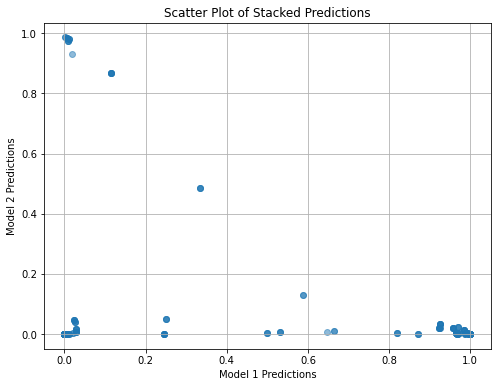

In [36]:
import matplotlib.pyplot as plt

# Assuming stacked_predictions contains the stacked predictions from both models

plt.figure(figsize=(8, 6))
plt.scatter(stacked_predictions[:, 0], stacked_predictions[:, 1], alpha=0.5)
plt.title('Scatter Plot of Stacked Predictions')
plt.xlabel('Model 1 Predictions')
plt.ylabel('Model 2 Predictions')
plt.grid(True)
plt.show()


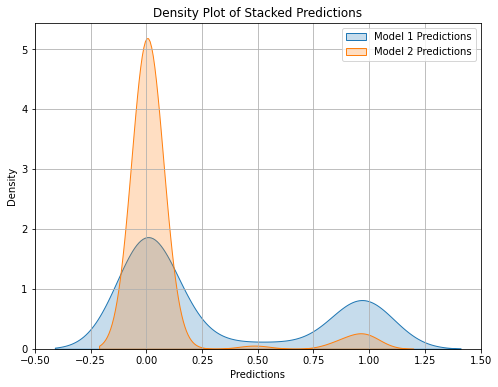

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(stacked_predictions[:, 0], label='Model 1 Predictions', shade=True)
sns.kdeplot(stacked_predictions[:, 1], label='Model 2 Predictions', shade=True)
plt.title('Density Plot of Stacked Predictions')
plt.xlabel('Predictions')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/train'
val_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/valid'
test_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/test'

input_shape = (224, 224, 3)
num_classes = 4

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 
predictions = Dense(num_classes, activation='softmax')(x)

resnet = Model(inputs=base_model.input, outputs=predictions)  # Change variable name to "resnet"

for layer in base_model.layers:
    layer.trainable = False

resnet.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_data_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    dtype='float32'
)

val_data_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    dtype='float32'
)

test_data_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    dtype='float32'
)

train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_data_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
history = resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    verbose=1,
    callbacks=[model_checkpoint]
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Epoch 1/100
20/20 [==============================] - 46s 2s/step - loss: 1.1474 - accuracy: 0.4927 - val_loss: 1.1978 - val_accuracy: 0.4583
Epoch 2/100
20/20 [==============================] - 43s 2s/step - loss: 0.8559 - accuracy: 0.6117 - val_loss: 1.0643 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 45s 2s/step - loss: 0.7603 - accuracy: 0.6721 - val_loss: 0.9595 - val_accuracy: 0.5278
Epoch 4/100
20/20 [==============================] - 46s 2s/step - loss: 0.7185 - accuracy: 0.6933 - val_loss: 0.9707 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 45s 2s/step - loss: 0.6605 - accuracy: 0.7455 - val_loss: 0.9841 - val_accuracy: 0.5972
Epoch 6/100
20/20 [==============================] - 47s 2s/step - loss: 0.7168 - accuracy: 0.6770 - val_loss: 0.8945 - val_accuracy: 0.6250
Epoch 7/100
20/20 [=============

In [14]:
y_pred_resnet = resnet.predict(test_data)
np.save('y_pred_resnet.npy', y_pred_resnet)


10/10 [==============================] - 21s 2s/step


In [15]:
print("Number of samples in y_pred_resnet:", y_pred_resnet.shape[0])

Number of samples in y_pred_resnet: 315


In [ ]:
file_path = "stacked_predictions.npy"
y_pred_to_stack_on = np.load(file_path)
stacked_predictions_2 = np.hstack((y_pred_resnet, y_pred_to_stack_on))
np.save('stacked_predictions_2.npy', stacked_predictions_2)

In [60]:
import numpy as np
y_pred_resnet = np.load('/Users/sonamchoden/CANCER PROJECT/y_pred_resnet.npy')

# Load the numpy array
file_path = "/Users/sonamchoden/CANCER PROJECT/stacked_predictions.npy"
stacked_predictions = np.load(file_path)

num_samples = stacked_predictions.shape[0]

print("Number of samples:", num_samples)


Number of samples: 315


In [61]:
y_pred_to_stack_on = np.load(file_path)
stacked_predictions_2 = np.hstack((y_pred_resnet, y_pred_to_stack_on))
np.save('stacked_predictions_2.npy', stacked_predictions_2)


In [63]:
stacked_predictions_2 = np.load('/Users/sonamchoden/CANCER PROJECT/stacked_predictions_2.npy')


Number of samples: 315


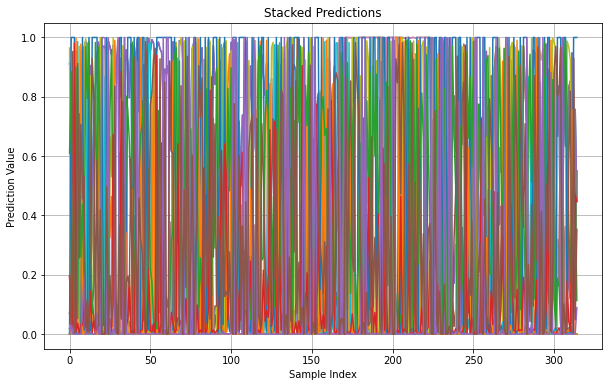

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stacked_predictions_2)
plt.xlabel('Sample Index')
plt.ylabel('Prediction Value')
plt.title('Stacked Predictions')
plt.grid(True)
plt.show()



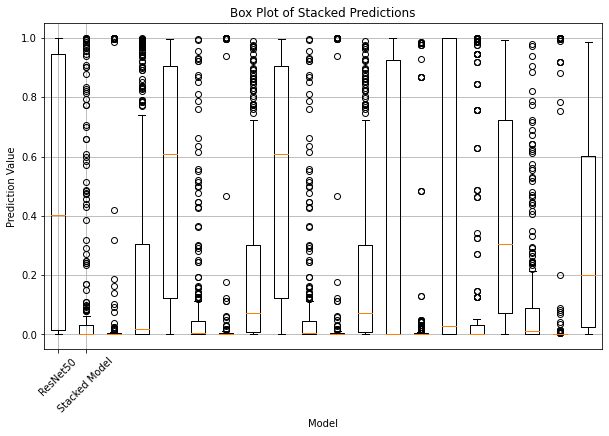

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(stacked_predictions_2)
plt.xlabel('Model')
plt.ylabel('Prediction Value')
plt.title('Box Plot of Stacked Predictions')
plt.xticks([1, 2], ['ResNet50', 'Stacked Model'], rotation=45)
plt.grid(True)
plt.show()


In [1]:
from keras.applications import VGG19
from keras.layers import BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input
import tensorflow as tf

input_shape = (224, 224, 3)
num_classes = 4

trainGenerator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    dtype='float32'
)
valGenerator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    dtype='float32'
)

testGenerator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    dtype='float32'
)

train_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/train'
val_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/valid'
test_dir = '/Users/sonamchoden/CANCER PROJECT/directory to extract/Data/test'

train_data = trainGenerator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_data = valGenerator.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_data = testGenerator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

VGG19_model = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

for layer in VGG19_model.layers:
    layer.trainable = False


vgg19_model = Sequential()
vgg19_model.add(VGG19_model)
vgg19_model.add(BatchNormalization())
vgg19_model.add(MaxPooling2D((2, 2)))
vgg19_model.add(Flatten())
vgg19_model.add(Dense(1024, activation='relu'))
vgg19_model.add(Dropout(0.3))
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dropout(0.3))
vgg19_model.add(Dense(256, activation='relu'))
vgg19_model.add(Dropout(0.3))
vgg19_model.add(Dense(128, activation='relu'))
vgg19_model.add(Dense(num_classes, activation='softmax'))

vgg19_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint('vgg19_model.keras', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='logs_vgg19')
]

results = vgg19_model.fit(train_data, validation_data=val_data, epochs=100, verbose=1)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Epoch 1/100
39/39 [==============================] - 73s 2s/step - loss: 1.3546 - accuracy: 0.4356 - val_loss: 1.1027 - val_accuracy: 0.4167
Epoch 2/100
39/39 [==============================] - 75s 2s/step - loss: 1.0045 - accuracy: 0.5432 - val_loss: 1.0439 - val_accuracy: 0.5000
Epoch 3/100
39/39 [==============================] - 82s 2s/step - loss: 0.8817 - accuracy: 0.6069 - val_loss: 1.2922 - val_accuracy: 0.5000
Epoch 4/100
39/39 [==============================] - 87s 2s/step - loss: 0.7990 - accuracy: 0.6362 - val_loss: 0.9444 - val_accuracy: 0.5972
Epoch 5/100
39/39 [==============================] - 90s 2s/step - loss: 0.7986 - accuracy: 0.6672 - val_loss: 0.9603 - val_accuracy: 0.5694
Epoch 6/100
39/39 [==============================] - 93s 2s/step - loss: 0.7425 - accuracy: 0.6900 - val_loss: 0.8358 - val_accuracy: 0.6111
Epoch 7/100
39/39 [=============

In [5]:
import numpy as np

y_pred_vgg19 = vgg19_model.predict(test_data)


20/20 [==============================] - 30s 1s/step


In [11]:
np.save('y_pred_vgg19.npy', y_pred_vgg19)

In [67]:

y_pred_vgg19 = np.load('y_pred_vgg19.npy')
file_path = "/Users/sonamchoden/CANCER PROJECT/stacked_predictions_2.npy"
y_pred_to_stack_on_2 = np.load(file_path)

stacked_predictions_total = np.hstack((y_pred_vgg19, y_pred_to_stack_on_2))

np.save('stacked_predictions_total.npy', stacked_predictions_total)

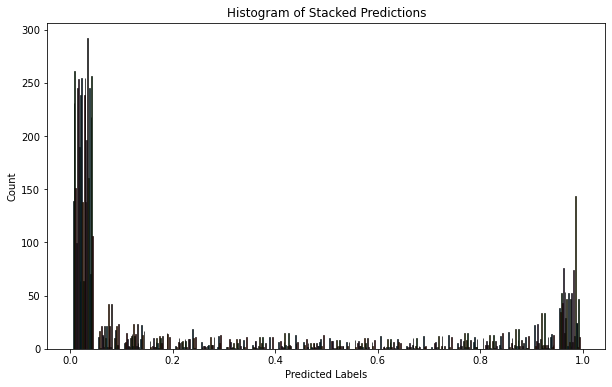

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(stacked_predictions_total, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Histogram of Stacked Predictions')
plt.show()


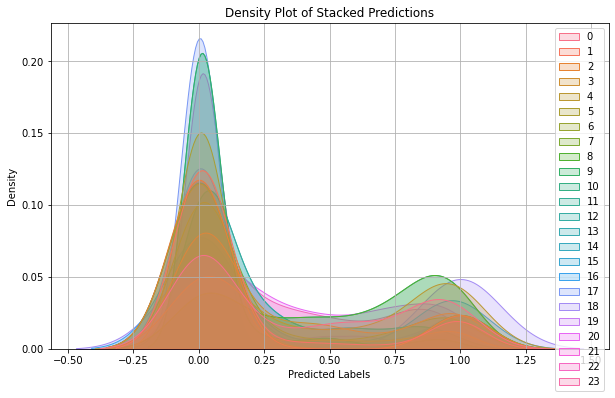

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=stacked_predictions_total, shade=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Density')
plt.title('Density Plot of Stacked Predictions')
plt.grid(True)
plt.show()


In [82]:

file_path = "/Users/sonamchoden/CANCER PROJECT/stacked_predictions_total.npy"
show = np.load(file_path)

# Get the shape of the array
num_samples = show.shape[0]

print("Number of samples:", num_samples)


Number of samples: 315


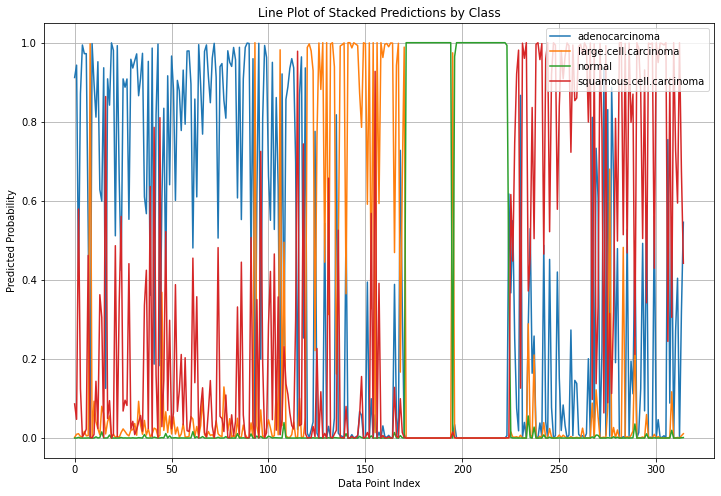

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    sns.lineplot(x=np.arange(len(stacked_predictions_total)), y=stacked_predictions_total[:, i], label=label)

plt.xlabel('Data Point Index')
plt.ylabel('Predicted Probability')
plt.title('Line Plot of Stacked Predictions by Class')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


/Users/sonamchoden/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sonamchoden/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


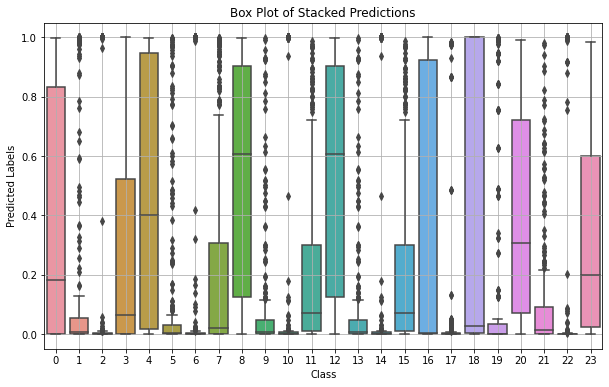

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=stacked_predictions_total)
plt.xlabel('Class')
plt.ylabel('Predicted Labels')
plt.title('Box Plot of Stacked Predictions')
plt.grid(True)

# Add horizontal grid lines
plt.gca().yaxis.grid(True)

# Calculate median for each class
medians = [np.median(stacked_predictions_total[stacked_predictions_total == i]) for i in range(len(labels))]

# Add median labels
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')

plt.show()


ValueError: The 'color' keyword argument must have one color per dataset, but 24 datasets and 1 colors were provided

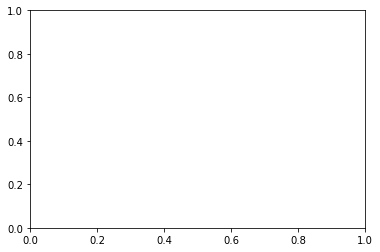

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Load predictions from "y_pred.npy"
y_pred = np.load("y_pred.npy")

# Assuming stacked_predictions_total contains your stacked predictions

# Plot histogram for stacked predictions
plt.hist(stacked_predictions_total, bins=np.arange(len(labels) + 1) - 0.5, alpha=0.5, color='blue', label='Stacked Predictions')

# Plot histogram for y_pred
plt.hist(y_pred, bins=np.arange(len(labels) + 1) - 0.5, alpha=0.5, color='green', label='y_pred')

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Comparison of Stacked Predictions and y_pred')
plt.xticks(np.arange(len(labels)), labels)  # Set labels for x-axis ticks

plt.legend()
plt.show()


In [8]:

indices = np.random.choice(len(y_train), size=len(stacked_predictions_total), replace=False)
y_train_subset = y_train[indices]
X_train_flat = stacked_predictions_total.reshape(stacked_predictions_total.shape[0], -1)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train_flat, y_train_subset)


LogisticRegression(penalty='l1', solver='liblinear')

In [30]:
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions_total, y_train_subset)
stacked_predictions_val = meta_model.predict(stacked_predictions_total) 
accuracy_stacked = accuracy_score(y_train_subset, stacked_predictions_val)
print("Stacked Model Accuracy:", accuracy_stacked)

Stacked Model Accuracy: 0.9380952380952381


Class labels: ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


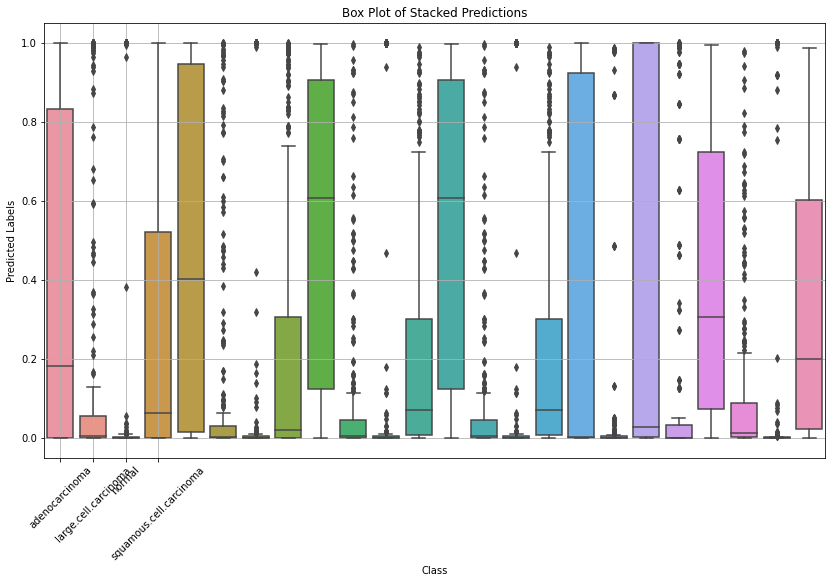

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming labels contains the class labels
labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']
print("Class labels:", labels)

plt.figure(figsize=(14, 8))  # Adjust figsize as needed
sns.boxplot(data=stacked_predictions_total)
plt.xlabel('Class')
plt.ylabel('Predicted Labels')
plt.title('Box Plot of Stacked Predictions')
plt.grid(True)

# Set x-axis tick labels to the list of class labels
plt.xticks(range(len(labels)), labels, rotation=45)  # Adjust rotation as needed

plt.show()


Dimensions of stacked_predictions_total: (315, 24)
Data type of stacked_predictions_total: float32
Unique values in stacked_predictions_total: [4.8603121e-33 1.2964621e-31 7.1118664e-31 ... 9.9999970e-01 9.9999982e-01
 9.9999994e-01]


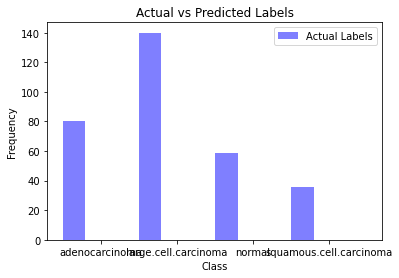

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train_subset contains the actual labels and stacked_predictions_total contains the predicted labels
# Also assuming that y_train_subset is an array of integers representing class indices

# Select random indices to match the size of stacked_predictions_total
indices = np.random.choice(len(y_train_subset), size=len(stacked_predictions_total), replace=False)

# Extract actual labels based on random indices
actual_labels = y_train_subset[indices]

# Plot histogram for actual labels
plt.hist(actual_labels, bins=np.arange(len(labels) + 1) - 0.5, width = 0.3, alpha=0.5, color='blue', label='Actual Labels')

try:
    # Count the frequency of predicted labels
    predicted_counts = np.bincount(stacked_predictions_total, minlength=len(labels))

    # Plot bar plot for predicted labels
    plt.bar(np.arange(len(labels)), predicted_counts, alpha=0.5, color='red', label='Predicted Labels')

except ValueError as e:
    print("Dimensions of stacked_predictions_total:", stacked_predictions_total.shape)
    print("Data type of stacked_predictions_total:", stacked_predictions_total.dtype)
    print("Unique values in stacked_predictions_total:", np.unique(stacked_predictions_total))

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Labels')
plt.xticks(np.arange(len(labels)), labels)  # Set labels for x-axis ticks

plt.legend()
plt.show()


In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#plt.hist(y_train_subset, bins=10, alpha=0.5, color='blue', label='Actual Labels')
#plt.hist(stacked_predictions_val, bins=10, alpha=0.5, color='red', label='Predicted Labels')

#plt.xlabel('Class')
#plt.ylabel('Frequency')
#plt.title('Actual vs Predicted Labels')
#plt.legend()
#plt.show()

In [6]:
from graphviz import Digraph

# Initialize the Digraph object
flow_graph = Digraph()

# Define nodes for each component/process
components = [
    "Data Loading",
    "Data Preprocessing",
    "Model Training (EfficientNetB0)",
    "Model Training (ResNet50)",
    "Model Training (InceptionResNetV2)",
    "Model Training (DenseNet201)",
    "Model Stacking",
    "Evaluation"
]

# Add nodes to the flow graph
for component in components:
    flow_graph.node(component)

# Define connections between components
connections = [
    ("Data Loading", "Data Preprocessing"),
    ("Data Preprocessing", "Model Training (EfficientNetB0)"),
    ("Data Preprocessing", "Model Training (ResNet50)"),
    ("Data Preprocessing", "Model Training (InceptionResNetV2)"),
    ("Data Preprocessing", "Model Training (DenseNet201)"),
    ("Model Training (EfficientNetB0)", "Model Stacking"),
    ("Model Training (ResNet50)", "Model Stacking"),
    ("Model Training (InceptionResNetV2)", "Model Stacking"),
    ("Model Training (DenseNet201)", "Model Stacking"),
    ("Model Stacking", "Evaluation")
]

# Add edges to the flow graph
for connection in connections:
    flow_graph.edge(connection[0], connection[1])

# Save the flow graph as a PDF file
flow_graph.render("flow_graph", format="pdf", cleanup=True)


'flow_graph.pdf'

In [5]:
import os

# Add Graphviz bin directory to PATH
os.environ["PATH"] += os.pathsep + "/usr/local/Cellar/graphviz/11.0.0/bin"


In [13]:
from graphviz import Digraph

# Initialize the Digraph object with the "dot" engine and setting the direction to "LR" (left to right)
dfd = Digraph(engine='dot', format='pdf')
dfd.attr(rankdir='LR')

# Define nodes for each component/process
components = [
    ("User", "box"),  # Using box for entity
    ("Raw Data", "box"),  # Using box for entity
    ("Data Loading", "ellipse"),  # Using ellipse for processing
    ("Data Preprocessing", "ellipse"),  # Using ellipse for processing
    ("Processed Data", "parallelogram"),  # Using parallelogram for data store
    ("Model Training", "ellipse"),  # Using ellipse for processing
    ("Trained Model", "parallelogram"),  # Using parallelogram for data store
    ("Evaluation Results", "box")  # Using box for entity
]

# Add nodes to the DFD with shapes corresponding to default shapes recognized by Graphviz
for component, shape in components:
    dfd.node(component, shape=shape)

# Define connections between components with labels indicating input/output
connections = [
    ("User", "Data Loading", "Input"),
    ("Data Loading", "Raw Data", "Input"),
    ("Raw Data", "Data Preprocessing", "Input"),
    ("Data Preprocessing", "Processed Data", "Output"),
    ("Processed Data", "Model Training", "Input"),
    ("Model Training", "Trained Model", "Output"),
    ("Trained Model", "Evaluation Results", "Input"),
    ("Processed Data", "Evaluation Results", "Input")  # Assuming evaluation uses processed data
]

# Add edges to the DFD with labels
for connection in connections:
    dfd.edge(connection[0], connection[1], label=connection[2])

# Save the DFD as a PDF file
dfd.render("detailed_wdata_flow_diagram_left_to_right", format="pdf", cleanup=True)


'detailed_wdata_flow_diagram_left_to_right.pdf'